In [ ]:
from svm_margin_plot import plot_svm_boundary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


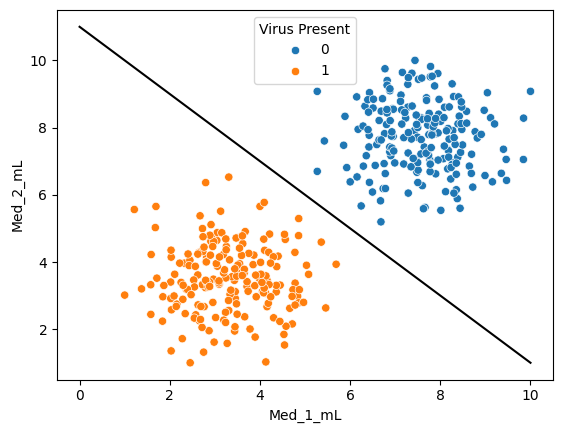

In [ ]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')

# провели сами гиперплоскость
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b

plt.plot(x, y, 'black')

In [ ]:
from sklearn.svm import SVC

In [ ]:
X = df.drop('Virus Present', axis=1)

In [ ]:
y = df['Virus Present']

In [ ]:
model = SVC(kernel='linear',C=1000)

In [ ]:
model.fit(X,y) # сделали исключение и обучили на всех данных

SVC(C=1000, kernel='linear')

c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


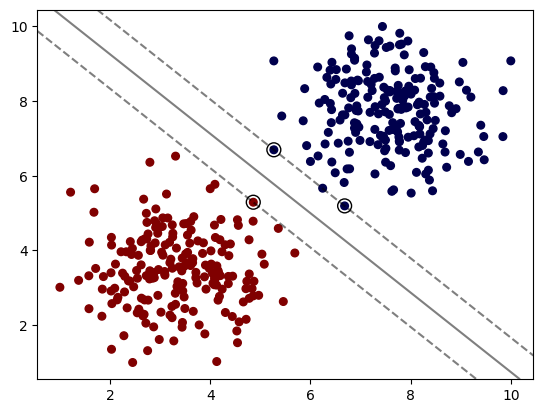

In [ ]:
plot_svm_boundary(model, X, y)

c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


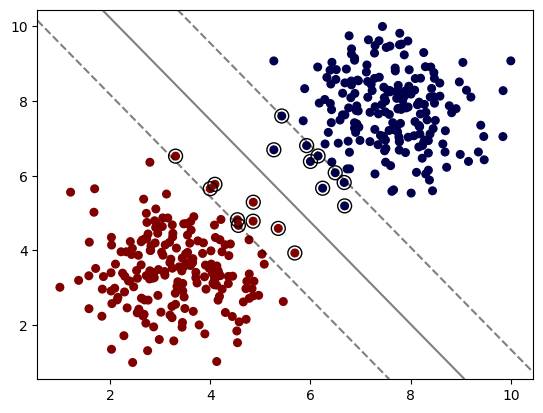

In [ ]:
# уменьшая С, допускаем большое число точек в зазор
model = SVC(kernel='linear',C=0.05)
model.fit(X,y) # сделали исключение и обучили на всех данных
plot_svm_boundary(model, X, y)

In [ ]:
# radial basis function. Преобразование данных в пространство большей размерности
# Гиперплоскость более сложной формы. Надежда на более точную кластеризацию
model = SVC(kernel='rbf',C=1, gamma='auto')
model.fit(X,y) # сделали исключение и обучили на всех данных
plot_svm_boundary(model, X, y)

NameError: name 'SVC' is not defined